# scikit-FIBERS: HLA Notebook (First FIBERS Paper Data)


***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
from sklearn.metrics import classification_report
from skfibers.fibers import FIBERS
current_working_directory = os.getcwd()
print(current_working_directory)

/project/kamoun_shared/data_shared/new_imputaions


In [2]:
imputation = '1'
typ = 1

In [3]:
local_save = False
folder_path = './ASHI_Output_1/Imp' + imputation + '/'
if not os.path.exists(folder_path):
        os.makedirs(folder_path)
if local_save:
    output_folder = 'local_output'
else:
    output_folder = folder_path

***
## Load and Prepare HLA Data

In [4]:
data_path = './NewImp' + imputation + '.csv'
data_name = 'NewImp' + imputation
all_data = pd.read_csv(data_path,low_memory=False)
all_data.shape

(166932, 2479)

In [5]:
all_data.head(3)

,Unnamed: 0,TX_ID,graftyrs,grf_fail,DON_AGE,REC_AGE_AT_TX,yearslice,diab_noted,CAN_RACE_WHITE,hispanic,...,MM_DPB1_219,MM_DPB1_220,MM_DPB1_221,MM_DPB1_222,MM_DPB1_223,MM_DPB1_224,MM_DPB1_225,MM_DPB1_226,MM_DPB1_227,MM_DPB1_228
0,0,1866540,2.001424,0,52,53,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1698801,6.001533,0,17,63,16,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1569773,1.275873,1,20,61,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# A 1-182
# B 1-182
# C 1-182
# DRB1 6-94
# DRB345 6-94
# DQA1 6-94
# DQB1 6-95  ??
# DPA1 6-94  ??  4-94 ??
# DPB1 6-94
#['MM_DPA1_4', 'MM_DPA1_5'] not in index

locus_list = ['A','B','C','DRB1','DRB345','DQA1','DQB1','DPA1','DPB1']
locus_range_list = [[1,182],[1,182],[1,182],[6,94],[6,94],[6,94],[6,95],[6,94],[6,94]]
locus_range_dict = dict(zip(locus_list, locus_range_list))
locus_type_dict = {
#     0: ['A','B','C','DRB1','DRB345','DQA1','DQB1','DPA1','DPB1'],
#     1: ['A','B','C','DRB1', 'DQB1'],
#     2: ['DRB1','DRB345','DQA1','DQB1'],
#     3: ['A','B','C','DRB1','DRB345','DQA1','DQB1'],
    1: ['DRB1', 'DQA1', 'DQB1'],
    2: ['DRB1', 'DQA1', 'DQB1', 'DRB345']
}

In [7]:
# covariates = ['DON_AGE', 'REC_AGE_AT_TX', 'yearslice', 'diab_noted', 'CAN_RACE_WHITE', 'hispanic', 
#               'CAN_RACE_BLACK', 'CAN_RACE_asian', 'donage_slope_ge18', 'DCD', 'DON_WGT_KG_M', 
#               'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'dcadcodanox', 'dcadcodcva', 
#               'dcadcodhead', 'dcadcodcnst', 'dcadcodoth', 'don_ecd', 'don_htn_0c', 
#               'AgmmA0', 'AgmmA1', 'AgmmA2', 'AgmmB0', 'AgmmB1', 'AgmmB2', 'AgmmDR0', 
#               'AgmmDR1', 'AgmmDR2', 'Agmm0', 'shared', 'PKPRA_1080', 'PKPRA_GE80', 
#               'PKPRA_lt10', 'PKPRA_MS', 'don_cmv_negative', 'rbmi_0c', 'rbmi_miss', 
#               'rbmi_gt_20', 'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 
#               'can_dgn_gd_ndm', 'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 
#               'rbmi_DM', 'rbmi_gt_20_DM', 'dm_can_age_spline_50', 'ln_c_hd_0c', 'ln_c_hd_m', 
#               'ln_c_hd_m_ptx', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'age_diab', 'age_ecd', 
#               'Agmmc0', 'Agmmc1', 'Agmmc2', 'Agmmdqb10', 'Agmmdqb11', 'Agmmdqb12', 
#               'Agmmdpa10', 'Agmmdpa11', 'Agmmdpa12', 'Agmmdpb10', 'Agmmdpb11', 
#               'Agmmdpb12', 'Agmmdqa10', 'Agmmdqa11', 'Agmmdqa12']

# covariates2 = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
#               'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
#               'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
#               'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
#               'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
#               'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
#               'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']

covariates = [
              'shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE',
               'Agmm0', 
              
            ]

cov_typ_dict = {
    'A': ['AgmmA0', 'AgmmA1',],
    'B': ['AgmmB0', 'AgmmB1',],
    'C': ['Agmmc0', 'Agmmc1',],
    'DRB1':  ['AgmmDR0', 'AgmmDR1',],
#     'DRB345':  ['AgmmDR0', 'AgmmDR1',],
    'DQA1':  ['Agmmdqa10', 'Agmmdqa11',],
    'DQB1':  ['Agmmdqb10', 'Agmmdqb11',],
#     'DPA1':  ['Agmmdpa10', 'Agmmdpa11',],
#     'DPB1':  ['Agmmdpb10', 'Agmmdpb11',],
}

In [8]:
# for locus in locus_type_dict[typ]:
#     if not (locus == 'DRB345' and 'DRB1' in locus_type_dict[typ]):
#         covariates += cov_typ_dict[locus]
for x in cov_typ_dict:
    covariates += cov_typ_dict[x]
covariates

['shared',
 'DCD',
 'DON_AGE',
 'donage_slope_ge18',
 'dcadcodanox',
 'dcadcodcva',
 'dcadcodcnst',
 'dcadcodoth',
 'don_cmv_negative',
 'don_htn_0c',
 'ln_don_wgt_kg_0c',
 'ln_don_wgt_kg_0c_s55',
 'don_ecd',
 'age_ecd',
 'yearslice',
 'REC_AGE_AT_TX',
 'rec_age_spline_35',
 'rec_age_spline_50',
 'rec_age_spline_65',
 'diab_noted',
 'age_diab',
 'dm_can_age_spline_50',
 'can_dgn_htn_ndm',
 'can_dgn_pk_ndm',
 'can_dgn_gd_ndm',
 'rec_prev_ki_tx',
 'rec_prev_ki_tx_dm',
 'rbmi_0c',
 'rbmi_miss',
 'rbmi_gt_20',
 'rbmi_DM',
 'rbmi_gt_20_DM',
 'ln_c_hd_m',
 'ln_c_hd_0c',
 'ln_c_hd_m_ptx',
 'PKPRA_MS',
 'PKPRA_1080',
 'PKPRA_GE80',
 'hispanic',
 'CAN_RACE_BLACK',
 'CAN_RACE_asian',
 'CAN_RACE_WHITE',
 'Agmm0',
 'AgmmA0',
 'AgmmA1',
 'AgmmB0',
 'AgmmB1',
 'Agmmc0',
 'Agmmc1',
 'AgmmDR0',
 'AgmmDR1',
 'Agmmdqa10',
 'Agmmdqa11',
 'Agmmdqb10',
 'Agmmdqb11']

In [9]:
outcome_label = "graftyrs"
censor_label = "grf_fail"
print(len(covariates))

55


In [10]:
filtered_columns = [col for col in all_data.columns if not col.startswith('MM_')]

print(filtered_columns)

['Unnamed: 0', 'TX_ID', 'graftyrs', 'grf_fail', 'DON_AGE', 'REC_AGE_AT_TX', 'yearslice', 'diab_noted', 'CAN_RACE_WHITE', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'donage_slope_ge18', 'DCD', 'DON_WGT_KG_M', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'dcadcodanox', 'dcadcodcva', 'dcadcodhead', 'dcadcodcnst', 'dcadcodoth', 'don_ecd', 'don_htn_0c', 'AgmmA0', 'AgmmA1', 'AgmmA2', 'AgmmB0', 'AgmmB1', 'AgmmB2', 'AgmmDR0', 'AgmmDR1', 'AgmmDR2', 'Agmm0', 'shared', 'PKPRA_1080', 'PKPRA_GE80', 'PKPRA_lt10', 'PKPRA_MS', 'don_cmv_negative', 'rbmi_0c', 'rbmi_miss', 'rbmi_gt_20', 'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'rbmi_DM', 'rbmi_gt_20_DM', 'dm_can_age_spline_50', 'ln_c_hd_0c', 'ln_c_hd_m', 'ln_c_hd_m_ptx', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'age_diab', 'age_ecd', 'Agmmc0', 'Agmmc1', 'Agmmc2', 'Agmmdqb10', 'Agmmdqb11', 'Agmmdqb12', 'Agmmdpa10', 'Agmmdpa11', 'Agmmdpa12', 'Agmmdpb10', 'Agmmdpb11', 'Agmmdpb12'

In [11]:
found_strings = [s for s in covariates if s in all_data.columns]
print(len(found_strings))

55


In [12]:
MM_feature_list = []
for locus in locus_type_dict[typ]:
    for j in range(locus_range_dict[locus][0],locus_range_dict[locus][1]+1):
        MM_feature_list.append('MM_'+str(locus)+'_'+str(j))
print(MM_feature_list)
print(len(MM_feature_list))

['MM_DRB1_6', 'MM_DRB1_7', 'MM_DRB1_8', 'MM_DRB1_9', 'MM_DRB1_10', 'MM_DRB1_11', 'MM_DRB1_12', 'MM_DRB1_13', 'MM_DRB1_14', 'MM_DRB1_15', 'MM_DRB1_16', 'MM_DRB1_17', 'MM_DRB1_18', 'MM_DRB1_19', 'MM_DRB1_20', 'MM_DRB1_21', 'MM_DRB1_22', 'MM_DRB1_23', 'MM_DRB1_24', 'MM_DRB1_25', 'MM_DRB1_26', 'MM_DRB1_27', 'MM_DRB1_28', 'MM_DRB1_29', 'MM_DRB1_30', 'MM_DRB1_31', 'MM_DRB1_32', 'MM_DRB1_33', 'MM_DRB1_34', 'MM_DRB1_35', 'MM_DRB1_36', 'MM_DRB1_37', 'MM_DRB1_38', 'MM_DRB1_39', 'MM_DRB1_40', 'MM_DRB1_41', 'MM_DRB1_42', 'MM_DRB1_43', 'MM_DRB1_44', 'MM_DRB1_45', 'MM_DRB1_46', 'MM_DRB1_47', 'MM_DRB1_48', 'MM_DRB1_49', 'MM_DRB1_50', 'MM_DRB1_51', 'MM_DRB1_52', 'MM_DRB1_53', 'MM_DRB1_54', 'MM_DRB1_55', 'MM_DRB1_56', 'MM_DRB1_57', 'MM_DRB1_58', 'MM_DRB1_59', 'MM_DRB1_60', 'MM_DRB1_61', 'MM_DRB1_62', 'MM_DRB1_63', 'MM_DRB1_64', 'MM_DRB1_65', 'MM_DRB1_66', 'MM_DRB1_67', 'MM_DRB1_68', 'MM_DRB1_69', 'MM_DRB1_70', 'MM_DRB1_71', 'MM_DRB1_72', 'MM_DRB1_73', 'MM_DRB1_74', 'MM_DRB1_75', 'MM_DRB1_76', 'MM_DRB1_

In [13]:
missing_sum = all_data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

Sum of raw data missing values: 0


In [14]:
features = MM_feature_list + covariates + [outcome_label] + [censor_label]
# features = MM_feature_list + [outcome_label] + [censor_label]
print(str(len(features))+ " Total Columns")
print(str(len(MM_feature_list))+" AAs")
print(str(len(covariates))+ " Covariates")

data = all_data[features]
print("Shape of New DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of data missing values:", missing_sum)

data.head(3)

325 Total Columns
268 AAs
55 Covariates
Shape of New DataFrame: (166932, 325)
Sum of data missing values: 0


,MM_DRB1_6,MM_DRB1_7,MM_DRB1_8,MM_DRB1_9,MM_DRB1_10,MM_DRB1_11,MM_DRB1_12,MM_DRB1_13,MM_DRB1_14,MM_DRB1_15,...,Agmmc0,Agmmc1,AgmmDR0,AgmmDR1,Agmmdqa10,Agmmdqa11,Agmmdqb10,Agmmdqb11,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,2.001424,0
1,0,0,0,0,1,1,1,1,0,0,...,0,1,0,1,0,1,0,0,6.001533,0
2,0,0,0,2,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,1.275873,1


In [15]:
# temp_df = pd.read_csv('/project/kamoun_shared/data_shared/CSV_from_SAS/tx_ki_agmm1.csv', sep=';')
# list(temp_df.columns)

In [16]:
filter_all_rare = True
rare_freq = 0.01
if filter_all_rare:
    #Filter out rare AAs (<1%)
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,MM_feature_list].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages < rare_freq].index.tolist()
    data = data.drop(columns=columns_to_remove)
else:
    #Filter out invariant AAs
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,MM_feature_list].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages == 0.0].index.tolist()
    data = data.drop(columns=columns_to_remove)
data.shape

MM_DRB1_6     0.000000
MM_DRB1_7     0.000000
MM_DRB1_8     0.000000
MM_DRB1_9     0.323737
MM_DRB1_10    0.322425
                ...   
MM_DQB1_91    0.000000
MM_DQB1_92    0.000000
MM_DQB1_93    0.000000
MM_DQB1_94    0.000000
MM_DQB1_95    0.000000
Length: 268, dtype: float64


(166932, 140)

In [17]:
missing_sum = data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

Sum of raw data missing values: 0


In [18]:
data.head(3)

,MM_DRB1_9,MM_DRB1_10,MM_DRB1_11,MM_DRB1_12,MM_DRB1_13,MM_DRB1_14,MM_DRB1_16,MM_DRB1_25,MM_DRB1_26,MM_DRB1_28,...,Agmmc0,Agmmc1,AgmmDR0,AgmmDR1,Agmmdqa10,Agmmdqa11,Agmmdqb10,Agmmdqb11,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,2.001424,0
1,0,1,1,1,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,6.001533,0
2,2,0,2,0,1,1,0,1,2,2,...,0,0,0,0,0,0,0,0,1.275873,1


In [19]:
missing_values_count = data.isnull().sum()

# Count number of columns with more than 0 missing values
columns_with_missing_values = (missing_values_count > 0).sum()
print(columns_with_missing_values)

0


In [20]:
for locus in locus_list:
    count = sum(['MM_'+str(locus) in col for col in data.columns])
    print('Remaining '+str(locus)+":"+str(count))

Remaining A:0
Remaining B:0
Remaining C:0
Remaining DRB1:30
Remaining DRB345:0
Remaining DQA1:24
Remaining DQB1:29
Remaining DPA1:0
Remaining DPB1:0


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
vif_table = calc_vif(data[covariates])
vif_table.to_csv('vif_table.csv')
vif_table

,variables,VIF
0,shared,1.781699
1,DCD,1.413484
2,DON_AGE,2824.031825
3,donage_slope_ge18,1134.233594
4,dcadcodanox,2.539983
5,dcadcodcva,2.311088
6,dcadcodcnst,1.014362
7,dcadcodoth,1.117925
8,don_cmv_negative,1.661154
9,don_htn_0c,1.907433


***
## Run FIBERS (Training)

In [23]:
#Load Manual Bin Population to Partially initialize Bin Population
# pop_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/HLA_Paper_Pop_Init.csv'
# pop = pd.read_csv(pop_path,low_memory=False)

In [24]:
for i in covariates:
    if i not in data.columns:
        print(i)

In [25]:
fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=500, pop_size=200, tournament_prop=0.5, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=0.5, elitism=0.1, diversity_pressure=5, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank_residuals", log_rank_weighting=None, censor_label="grf_fail", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=covariates, report=None, 
                random_seed=None,verbose=False)

fibers = fibers.fit(data)

Dropped 0 invariant feature columns.


/home/bandheyh/anaconda3/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['PKPRA_MS'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 9.54e-01, step_size = 0.9500, log_lik = -444776.33050, newton_decrement = 4.80e+03, seconds_since_start = 1.5
Iteration 2: norm_delta = 3.81e-01, step_size = 0.9500, log_lik = -440313.07915, newton_decrement = 2.05e+02, seconds_since_start = 3.1
Iteration 3: norm_delta = 4.47e-02, step_size = 0.9500, log_lik = -440101.37491, newton_decrement = 2.81e+00, seconds_since_start = 4.8
Iteration 4: norm_delta = 5.65e-04, step_size = 1.0000, log_lik = -440098.54659, newton_decrement = 4.79e-04, seconds_since_start = 6.3
Iteration 5: norm_delta = 9.51e-08, step_size = 1.0000, log_lik = -440098.54611, newton_decrement = 1.74e-11, seconds_since_start = 8.0
Convergence success after 5 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [1:55:25<00:00, 13.85s/it]

Random Seed Check - End: 0.015642943171785384
FIBERS Run Complete!
Elapsed Time (sec):  7048.424830675125 seconds


### Report Run Time

In [26]:
# Report run time
print(fibers.elapsed_time)

7048.424830675125


***
## Top (or Target) Bin Examination
### Specify Bin to Examine

In [27]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

### Get Bin Details

In [28]:
fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3..."
Threshold:,0
Fitness,1.0
Pre-Fitness:,1129.779426
Log-Rank Score:,220.925864
Log-Rank p-value:,0.0
Bin Size:,8
Group Ratio:,0.294341
Count At/Below Threshold:,49135
Count Above Threshold:,117797


### Plot: Kaplan Meier Survival Curves For Each Group Defined by the Target Bin

Dropped 0 invariant feature columns.


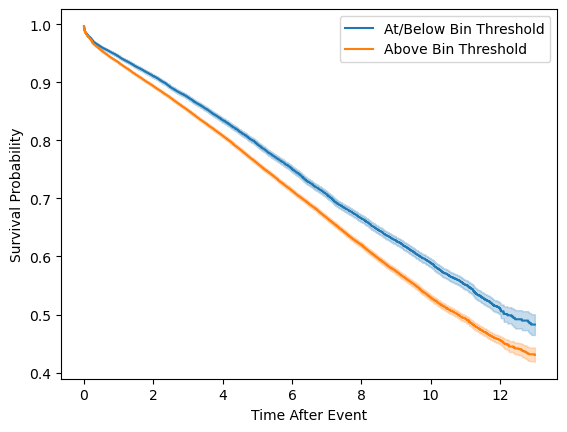

In [29]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Evaluate Target Bin Using Cox Proportional Hazard Model (adjusting for covariates)

In [30]:
summary = fibers.get_cox_prop_hazard(data, bin_index)
bin_hr = summary['exp(coef)'].iloc[0]
bin_low_CI = summary['exp(coef) lower 95%'].iloc[0]
bin_upper_CI = summary['exp(coef) upper 95%'].iloc[0]
bin_p_val = summary['p'].iloc[0]
print("Bin HR: "+str(bin_hr)+" ("+str(bin_low_CI)+"-"+str(bin_upper_CI)+")")
print("Bin HR p-value: "+str(bin_p_val))
summary.to_csv(output_folder+'/'+'Cox_PH_'+str(bin_index)+'_'+data_name+'.csv', index=False)
summary

Dropped 0 invariant feature columns.
Bin HR: 1.0815331834364845 (1.0500222931110175-1.1139897072171823)
Bin HR p-value: 2.0419153795331692e-07


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Bin_0,0.078380,1.081533,0.015086,0.048811,0.107948,1.050022,1.113990,0.0,5.195481,2.041915e-07,22.223574
shared,0.127669,1.136177,0.011856,0.104432,0.150906,1.110080,1.162887,0.0,10.768626,4.841741e-27,87.416533
DCD,0.107105,1.113051,0.012780,0.082057,0.132153,1.085517,1.141283,0.0,8.380708,5.261046e-17,54.077428
DON_AGE,-0.007459,0.992569,0.006869,-0.020923,0.006005,0.979295,1.006023,0.0,-1.085848,2.775460e-01,1.849201
donage_slope_ge18,0.017367,1.017518,0.007016,0.003616,0.031118,1.003622,1.031607,0.0,2.475297,1.331254e-02,6.231070
dcadcodanox,0.034427,1.035026,0.013130,0.008692,0.060161,1.008730,1.062008,0.0,2.621950,8.742821e-03,6.837685
dcadcodcva,0.077315,1.080383,0.014226,0.049432,0.105198,1.050675,1.110931,0.0,5.434688,5.489237e-08,24.118819
dcadcodcnst,0.029398,1.029835,0.078272,-0.124013,0.182809,0.883368,1.200585,0.0,0.375588,7.072230e-01,0.499763
dcadcodoth,0.118331,1.125617,0.031489,0.056613,0.180048,1.058247,1.197275,0.0,3.757838,1.713879e-04,12.510447


### Check and View Any Top Bin Ties

In [31]:
fibers.report_ties()

Only one top performing bin found


***
## Bin Population Examination
### Plot: Basic Bin Population Heatmap

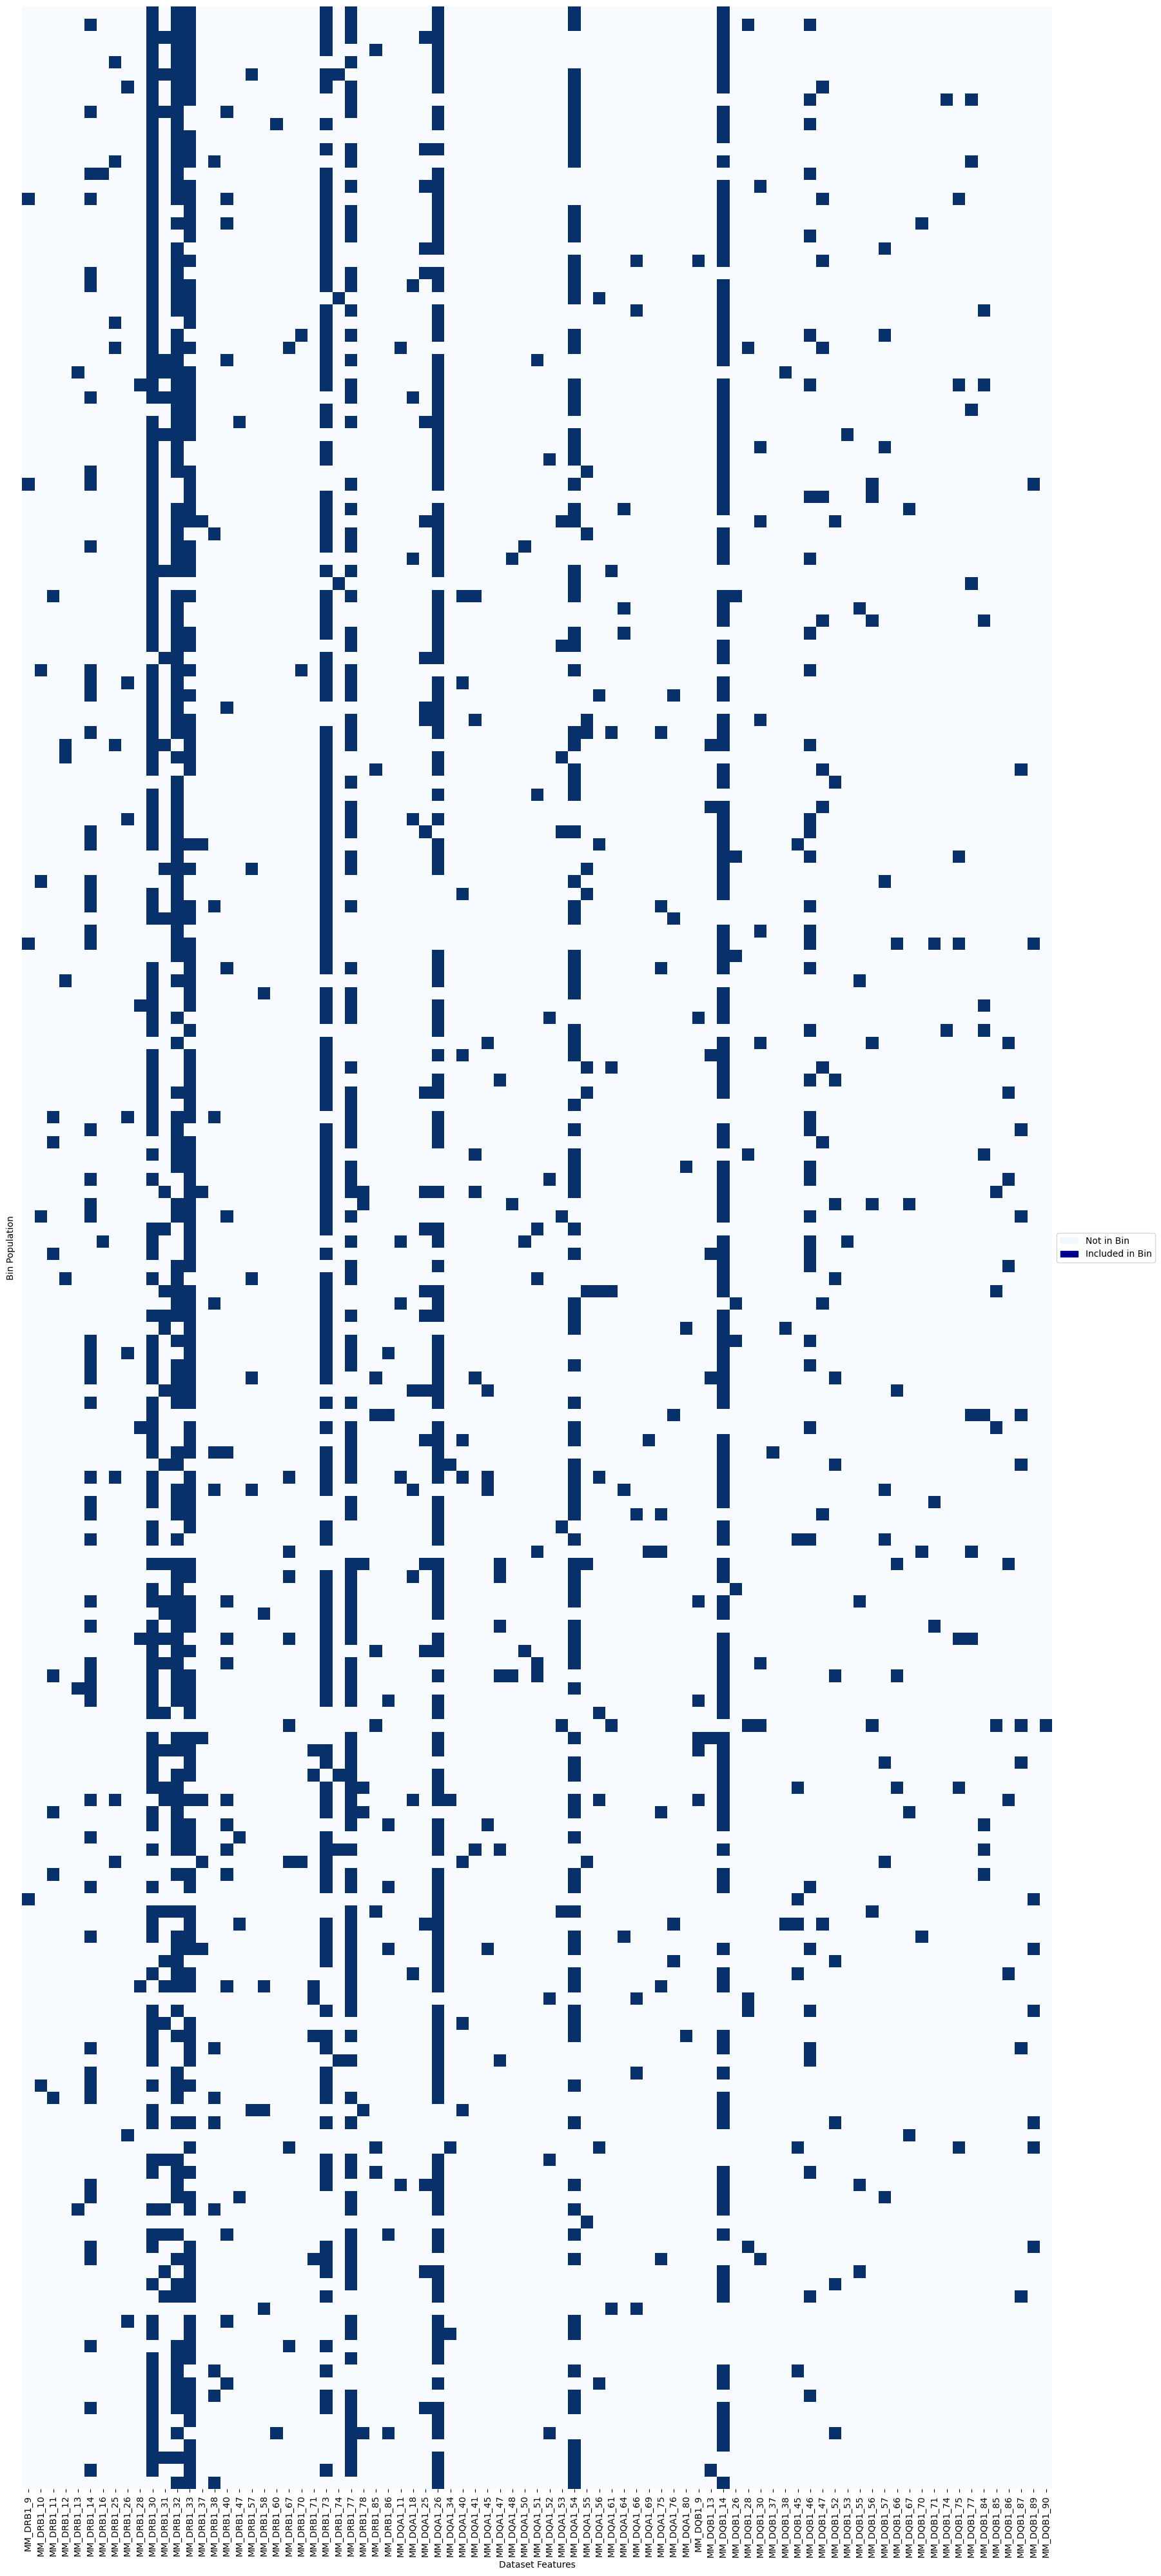

In [32]:
fibers.get_bin_population_heatmap_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Custom Bin Population Heatmap

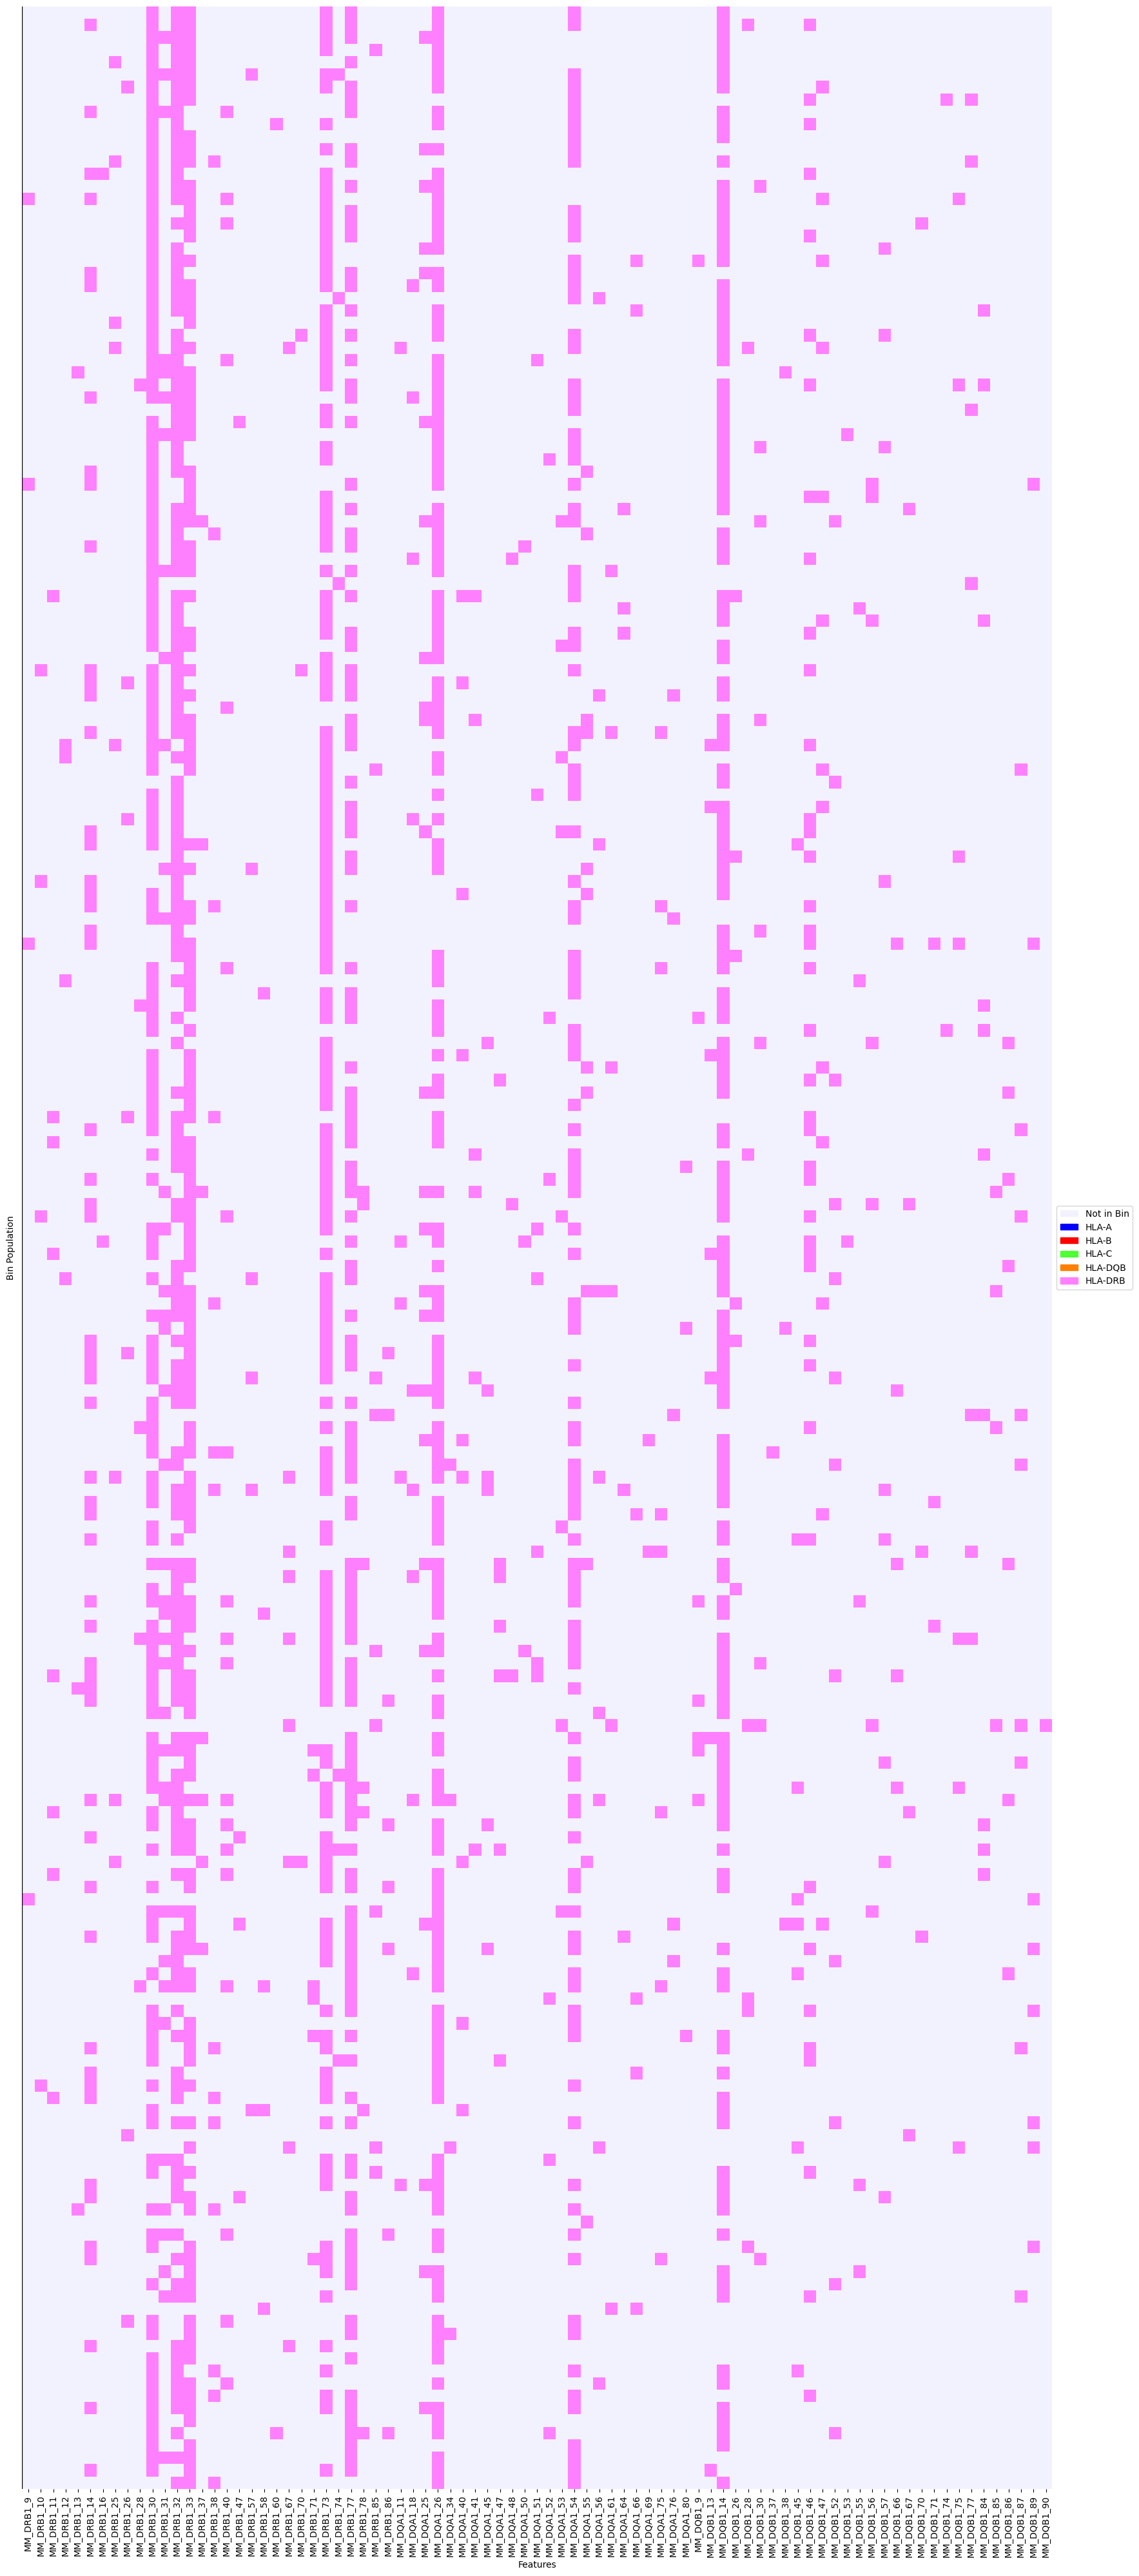

In [33]:
group_names=["A", "B", "C", "DQB", "DRB"]
legend_group_info = ['Not in Bin','HLA-A','HLA-B', 'HLA-C','HLA-DQB','HLA-DRB'] #2 default colors first followed by additional color descriptions in legend
color_features = [['B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99'],['C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'],['DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194'],[ 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']]
colors = [(1, 0, 0),(0.3,1,0.2),(1, 0.5, 0),(1,0.5,1)] # blue,red,green,orange,pink ---Alternatively orange (1, 0.5, 0)
default_colors = [(.95, .95, 1),(0, 0, 1)] #very light blue and blue
max_bins = 100
max_features = 100

fibers.get_custom_bin_population_heatmap_plot(group_names,legend_group_info,color_features,colors,default_colors,max_bins,max_features,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Population Pareto Front
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

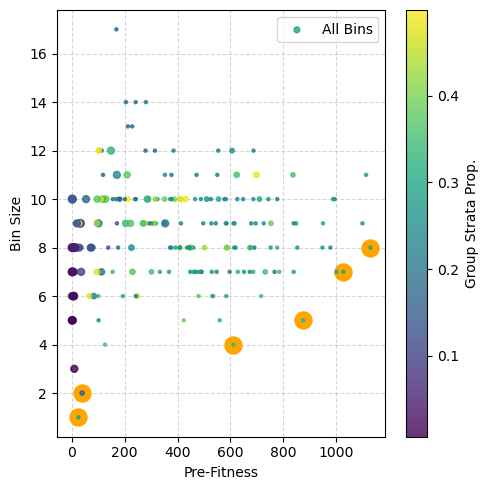

In [34]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Estimated Feature Tracking Scores
These scores accumulate throughout the training process, and do not nesessarily reflect feature importance of individual bins or the final bin population.

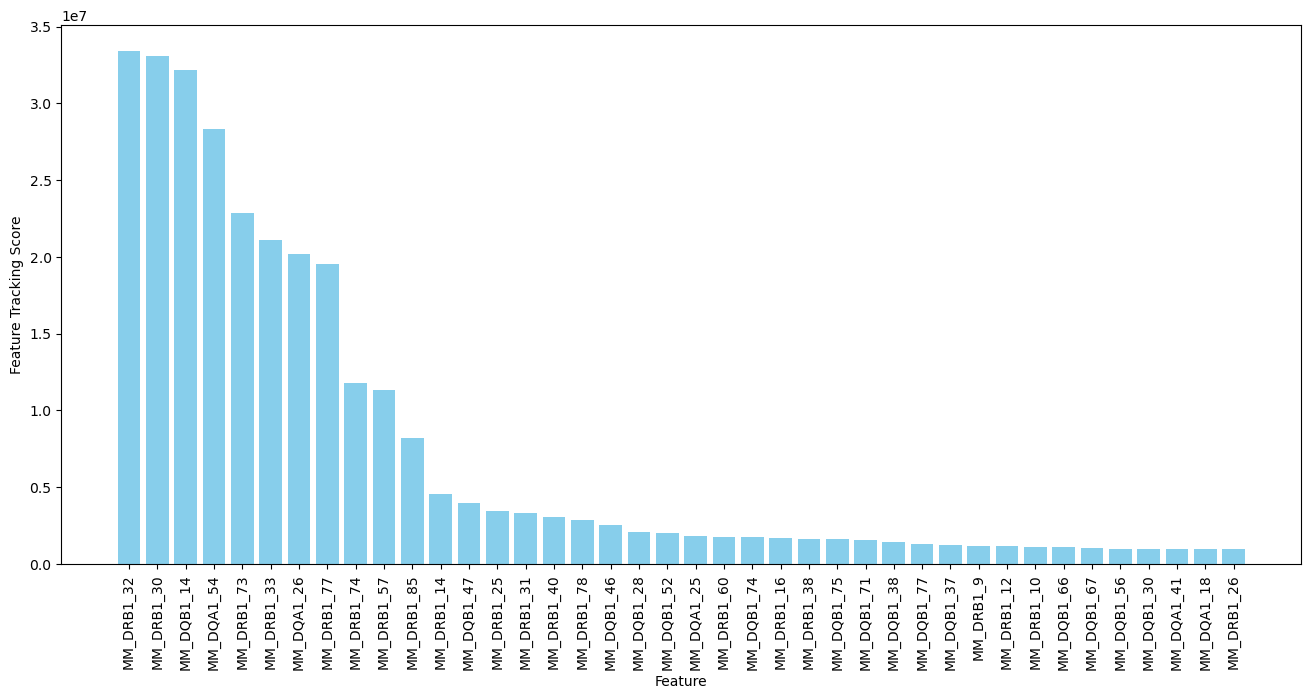

In [35]:
fibers.get_feature_tracking_plot(max_features=40,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Dataset Covariate Residuals (if applicable)

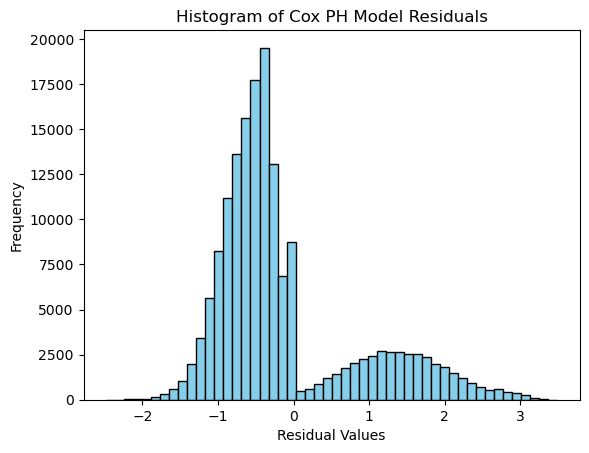

In [36]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Log-Rank Scores Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

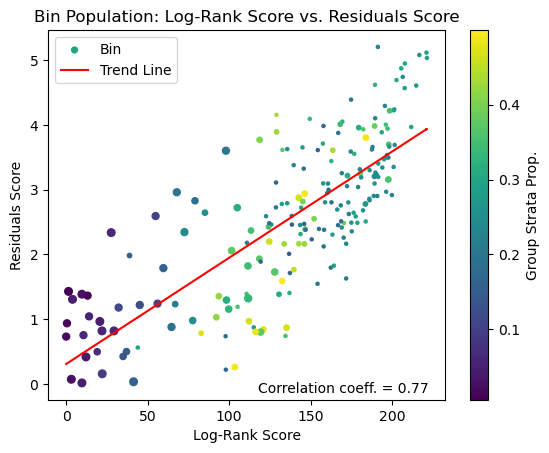

In [37]:
if fibers.fitness_metric == 'log_rank_residuals':
    fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

###  Evaluate All Bins in Population using Cox PH Model (Can be slow)

In [38]:
fibers.calculate_cox_prop_hazards(data)

Dropped 0 invariant feature columns.


### Plot: Bin Log-Rank Scores Vs. Adjusted Hazard Ratios (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

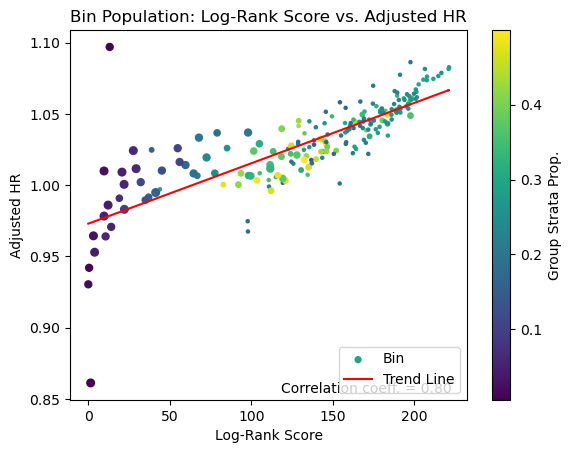

In [39]:
if fibers.fitness_metric == 'log_rank' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_log_rank_adj_HR_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

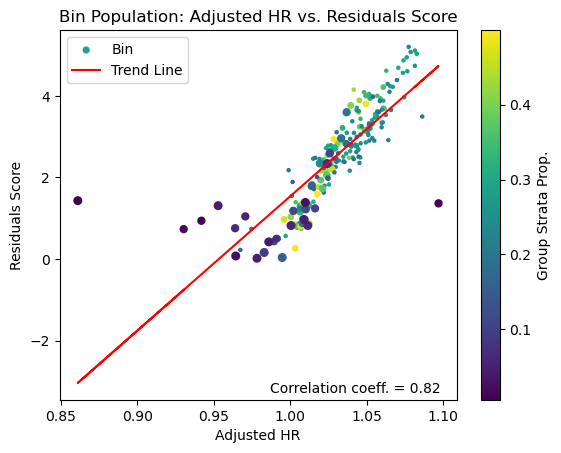

In [40]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Log Rank * Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

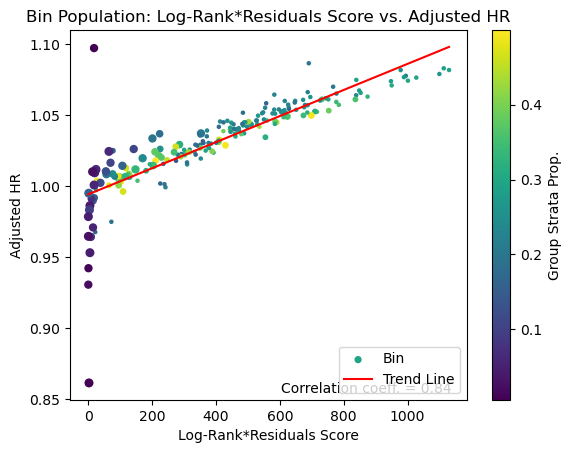

In [41]:
if fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_metric_product_plot(save=True,output_folder=output_folder,data_name=data_name)

***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Fitness of top bin across training iterations

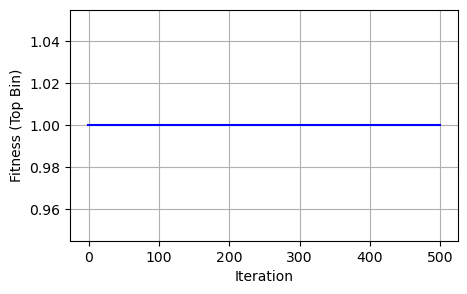

In [42]:
fibers.get_fitness_progress_plot()

### Plot: Scoring Metric and Pre-Fitness of top bin across training iterations

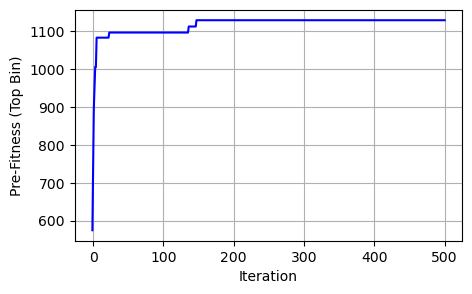

In [43]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

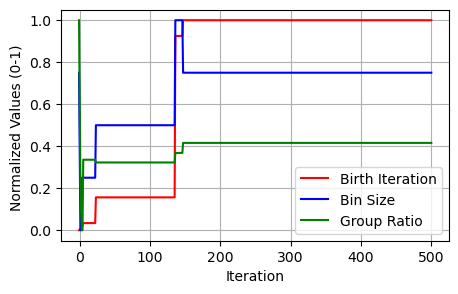

In [44]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### View Top Bin Information Across all Iterations/Generations

In [45]:
fibers.perform_track_df

,Iteration,Top Bin,Threshold,Fitness,Pre-Fitness,Log-Rank Score,Log-Rank p-value,Bin Size,Group Ratio,Count At/Below Threshold,Count Below Threshold,Birth Iteration,Residuals Score,Residuals p-value,Elapsed Time
0,-1,"[MM_DRB1_31, MM_DRB1_47, MM_DRB1_32, MM_DQB1_7...",3,1.0,574.382897,171.674862,3.186913e-39,8,0.425694,95870,71062,0,3.345760,8.205737e-04,123.189312
1,1,"[MM_DQA1_26, MM_DQB1_71, MM_DRB1_30, MM_DRB1_3...",0,1.0,894.313405,197.691960,6.660583e-45,5,0.251012,41902,125030,1,4.523772,6.074709e-06,140.128994
2,2,"[MM_DQA1_26, MM_DQB1_71, MM_DRB1_30, MM_DRB1_3...",0,1.0,951.459780,192.357521,9.721904e-44,5,0.221449,36967,129965,2,4.946309,7.563378e-07,153.850195
3,3,"[MM_DQA1_26, MM_DQB1_71, MM_DRB1_30, MM_DRB1_3...",0,1.0,1006.249146,192.680066,8.267067e-44,6,0.200836,33526,133406,3,5.222383,1.766349e-07,166.421832
4,4,"[MM_DQA1_26, MM_DQB1_71, MM_DRB1_30, MM_DRB1_3...",0,1.0,1006.249146,192.680066,8.267067e-44,6,0.200836,33526,133406,3,5.222383,1.766349e-07,178.755649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3...",0,1.0,1129.779426,220.925864,5.681081e-50,8,0.294341,49135,117797,147,5.113840,3.156755e-07,6945.517940
497,497,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3...",0,1.0,1129.779426,220.925864,5.681081e-50,8,0.294341,49135,117797,147,5.113840,3.156755e-07,6958.544189
498,498,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3...",0,1.0,1129.779426,220.925864,5.681081e-50,8,0.294341,49135,117797,147,5.113840,3.156755e-07,6971.638810
499,499,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3...",0,1.0,1129.779426,220.925864,5.681081e-50,8,0.294341,49135,117797,147,5.113840,3.156755e-07,7034.953259


***
## Save Bin Population
### Save Bin Population Details to CSV

In [46]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [47]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Transforming Bins Into New Features (i.e. Feature Learning) and Save as New CSV Files
### Transform Bins Using Total Sums (i.e. Respective Bin Thresholds Not Applied)

In [48]:
tdf = fibers.transform(data,full_sums=True)
tdf.to_csv(output_folder+'/'+'Transformed_FullSums_'+data_name+'.csv', index=False)
tdf

Dropped 0 invariant feature columns.


/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_192,Bin_193,Bin_194,Bin_195,Bin_196,Bin_197,Bin_198,Bin_199,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.001424,0
1,0,2,0,0,0,1,1,3,0,1,...,1,0,0,1,0,0,1,0,6.001533,0
2,7,12,8,6,6,11,11,8,8,10,...,6,9,5,11,4,6,7,4,1.275873,1
3,2,2,2,1,2,2,3,2,2,1,...,2,2,1,3,1,2,1,1,0.815902,1
4,2,2,2,2,2,4,2,2,2,3,...,1,2,1,3,1,1,0,2,4.977549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166927,2,2,3,2,2,3,3,2,4,2,...,3,2,1,3,1,3,1,2,0.000000,0
166928,3,4,3,2,2,5,3,2,3,4,...,3,5,1,5,2,2,4,1,0.000000,0
166929,3,7,3,3,1,5,5,7,1,5,...,5,3,1,4,1,1,4,0,0.000000,0
166930,1,1,2,2,1,3,2,1,2,1,...,1,1,1,2,1,2,1,0,0.000000,0


### Transform Bins Using Respective Bin Threshold (i.e. 0 = At/Under Threshold Group and 1 = Over Threshold Group)

In [49]:
tdf = fibers.transform(data,full_sums=False)
tdf.to_csv(output_folder+'/'+'Transformed_Threshold'+data_name+'.csv', index=False)
tdf

Dropped 0 invariant feature columns.


/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf['Bin_'+str(bin_count)] = feature_sums
/home/bandheyh/anaconda3/lib/python3.9/site-packages/skfibers/fibers.py:449: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_192,Bin_193,Bin_194,Bin_195,Bin_196,Bin_197,Bin_198,Bin_199,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.001424,0
1,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,6.001533,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,0,1.275873,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.815902,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,4.977549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166927,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,0
166928,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,0
166929,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,0
166930,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,0


***
## Open Pickled FIBERS Object (Example)

In [50]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[MM_DQA1_26, MM_DQA1_54, MM_DQB1_14, MM_DRB1_3..."
Threshold:,0
Fitness,1.0
Pre-Fitness:,1129.779426
Log-Rank Score:,220.925864
Log-Rank p-value:,0.0
Bin Size:,8
Group Ratio:,0.294341
Count At/Below Threshold:,49135
Count Above Threshold:,117797
